<a href="https://colab.research.google.com/github/hebaismail6848/Machine-Deep-learning-projects/blob/main/Hotel_reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split
import pickle  as pkl

In [ ]:
data = pd.read_csv('Hotel Reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.shape

(36275, 19)

In [ ]:
data.duplicated().sum()

0

In [ ]:
if len(set(data['Booking_ID'])) == len(data):
  data.drop('Booking_ID',axis=1, inplace=True)

In [ ]:
data.duplicated().sum()

10275

In [ ]:
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True)
data.head()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.drop('index',axis=1,inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
data.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
def get_info(data):
  cols=[]
  dtype=[]
  unique_v=[]
  n_unique=[]

  for col in data.columns:
    cols.append(col)
    dtype.append(data[col].dtype.name)
    unique_v.append(data[col].unique())
    n_unique.append(data[col].nunique())

  return pd.DataFrame({'columns':cols,'data type':dtype,'unique_v':unique_v,'n_unique':n_unique})

In [ ]:
get_info(data)

,columns,data type,unique_v,n_unique
0,no_of_adults,int64,"[2, 1, 3, 0, 4]",5
1,no_of_children,int64,"[0, 2, 1, 3, 10, 9]",6
2,no_of_weekend_nights,int64,"[1, 2, 0, 4, 3, 6, 5, 7]",8
3,no_of_week_nights,int64,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,...",18
4,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4
5,required_car_parking_space,int64,"[0, 1]",2
6,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 2, Room_T...",7
7,lead_time,int64,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ...",352
8,arrival_year,int64,"[2017, 2018]",2
9,arrival_month,int64,"[10, 11, 2, 5, 4, 9, 12, 7, 6, 8, 3, 1]",12


In [ ]:
data['no_of_adults'].isnull().sum()

0

In [ ]:
data['no_of_adults'].value_counts()

2    18871
1     4800
3     2178
0      135
4       16
Name: no_of_adults, dtype: int64

In [ ]:
data[data['no_of_adults']==0]['booking_status'].value_counts()

Not_Canceled    92
Canceled        43
Name: booking_status, dtype: int64

In [ ]:
data[data['no_of_adults']==0]['no_of_children'].value_counts()


2    129
3      5
1      1
Name: no_of_children, dtype: int64

In [ ]:
data[data['no_of_children']==10]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
5289,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,2018,1,12,Online,0,0,0,84.45,1,Not_Canceled


In [ ]:
data[data['no_of_children']==9]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
8180,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,2017,10,11,Corporate,0,0,0,95.0,0,Not_Canceled
8196,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,2017,8,13,Online,0,0,0,76.5,1,Canceled


In [ ]:
data['no_of_children'].value_counts()

0     23422
1      1524
2      1033
3        18
9         2
10        1
Name: no_of_children, dtype: int64

In [ ]:
data['no_of_children'].replace(9,0,inplace=True)
data['no_of_children'].replace(10,0,inplace=True)

In [ ]:
data['no_of_children'].value_counts()

0    23425
1     1524
2     1033
3       18
Name: no_of_children, dtype: int64

In [ ]:
get_info(data)

,columns,data type,unique_v,n_unique
0,no_of_adults,int64,"[2, 1, 3, 0, 4]",5
1,no_of_children,int64,"[0, 2, 1, 3]",4
2,no_of_weekend_nights,int64,"[1, 2, 0, 4, 3, 6, 5, 7]",8
3,no_of_week_nights,int64,"[2, 3, 1, 4, 5, 0, 10, 6, 11, 7, 15, 9, 13, 8,...",18
4,type_of_meal_plan,object,"[Meal Plan 1, Not Selected, Meal Plan 2, Meal ...",4
5,required_car_parking_space,int64,"[0, 1]",2
6,room_type_reserved,object,"[Room_Type 1, Room_Type 4, Room_Type 2, Room_T...",7
7,lead_time,int64,"[224, 5, 1, 211, 48, 346, 34, 83, 121, 44, 0, ...",352
8,arrival_year,int64,"[2017, 2018]",2
9,arrival_month,int64,"[10, 11, 2, 5, 4, 9, 12, 7, 6, 8, 3, 1]",12


In [ ]:
data[data['no_of_weekend_nights']==0]['no_of_week_nights'].value_counts()

1    3876
2    3089
3    2606
4    1237
5     204
0      75
Name: no_of_week_nights, dtype: int64

In [ ]:
zero_days=data[data['no_of_weekend_nights']==0]
zero_days[zero_days['no_of_week_nights']==0]['booking_status'].value_counts()

Not_Canceled    73
Canceled         2
Name: booking_status, dtype: int64

In [ ]:
for i in range(len(data)):
  if data.loc[i,'no_of_week_nights'] == 0 and data.loc[i,'no_of_weekend_nights'] == 0:
    data.loc[i,'no_of_week_nights']=1

In [ ]:
data[data['no_of_weekend_nights']==0]['no_of_week_nights'].value_counts()

1    3951
2    3089
3    2606
4    1237
5     204
Name: no_of_week_nights, dtype: int64

<ipython-input-201-ca12adb3f6af>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['lead_time'])


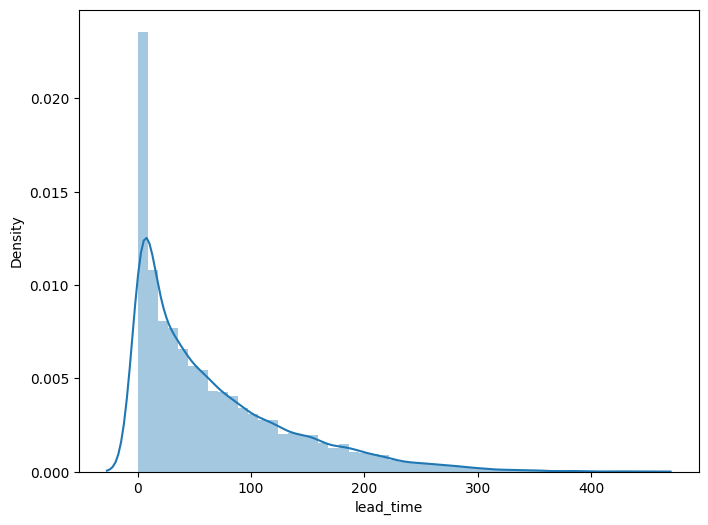

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(data['lead_time'])
plt.show()

In [ ]:
data['lead_time'].max()

443

#encoding

In [ ]:
# data['booking_status'].value_counts()

In [ ]:
# le=LabelEncoder()
# data['booking_status']=le.fit_transform(data['booking_status'])
# data['booking_status'].value_counts()

In [ ]:
# data=pd.get_dummies(data, drop_first=True)
# data.head()

In [ ]:
# data.columns

In [ ]:
cat_features=[]
for col in data.columns:
  if data[col].dtype=='object':
    cat_features.append(col)

In [ ]:
cat_features

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [ ]:
for col in cat_features:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
  pkl.dump(le,open(f'{col}_le.pkl','wb') )

#check Balance

In [ ]:
data['booking_status'].unique()

array([1, 0])

In [ ]:
data['booking_status'].value_counts()

1    18558
0     7442
Name: booking_status, dtype: int64

([<matplotlib.patches.Wedge at 0x7f35722e0ca0>,
 [Text(-0.6844425077320773, 0.8611262704211419, '1'),
  Text(0.80888669533045, -1.0176946074915518, '0')],
 [Text(-0.3733322769447694, 0.4697052384115319, '71.38%'),
  Text(0.4977764278956615, -0.6262736046101858, '28.62%')])

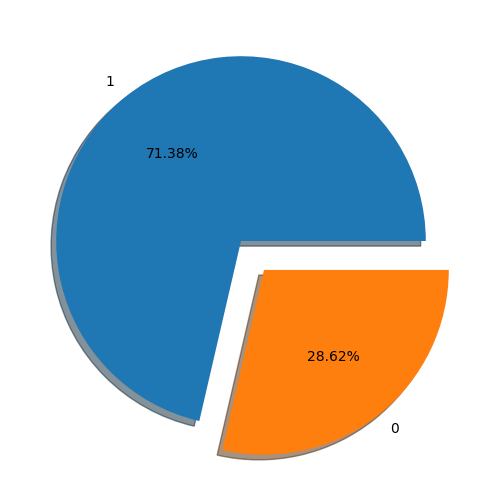

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(x=data['booking_status'].value_counts(),labels=data['booking_status'].unique(),explode=[0,.2],autopct='%0.2f%%',shadow=True)

#Split_data

In [ ]:
x=data.drop('booking_status',axis=1).values
y=data['booking_status'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

#Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
pkl.dump(scaler,open('scaler.pkl','wb') )

#Logistic_regression

In [ ]:
model=LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
def evaluate_model(x_test,y_test):
  y_pred=model.predict(x_test)

  accuracy=accuracy_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred)

  return pd.Series({'accuracy': accuracy, 'recall': recall , 'precision':precision, 'f1':f1 })

#check overfitting

In [ ]:
evaluate_model(x_train,y_train)

accuracy     0.769396
recall       0.766192
precision    0.895500
f1           0.825814
dtype: float64

In [ ]:
evaluate_model(x_test,y_test)

accuracy     0.774615
recall       0.770142
precision    0.899979
f1           0.830014
dtype: float64

#Random_forest

In [ ]:
model=RandomForestClassifier(max_depth=12,class_weight='balanced')
model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12)

In [ ]:
evaluate_model(x_train,y_train)

accuracy     0.877418
recall       0.911513
precision    0.916241
f1           0.913871
dtype: float64

In [ ]:
evaluate_model(x_test,y_test)

accuracy     0.855000
recall       0.897362
precision    0.899460
f1           0.898410
dtype: float64

In [ ]:
pkl.dump(model,open('model.pkl','wb') )